<h1 style = "color:blue;font-size:25px;font-family:verdana;text-align: center"><center>Machine Learning for Predicting Building Energy Consumptions</center></h1>

![picture1.jpg](picture1.jpg)
<h3 style="color:blue;font-size:20px;font-family:verdana">Project Goals</h3>
 
<h3 style="font-size:18px;font-family:verdana">The main goal of this project is to predict the Site Energy Use Intensity(EUI) using available building characteristics and climate and weather variables.</h3>

### **<span style="color:blue;">Section 1: Look at the big picture</span>**

This dataset was collected from Kaggle WiDS Datathon 2022 Competition, and it was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab). The dataset  includes roughly 100k observations of building energy usage records, building characteristics and site climate and weather data collected over 7 years and several states within the United States. Each row in the dataset corresponds to a single building observation in a given year.

This dataset can use to analyze the correlation between given variables and study how they are affecting in building energy efficiency.  And it can use for creating models to predict building energy consumption. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to improve building energy efficiencies and reduce energy related GHG emissions.

### **<span style="color:blue;">1.1: Data Description</span>**

This data includes features such as:

|**Variable**|**Description**|
|:-----------|:--------------|
|**id:**     |building Id|1 to 75757 data instences|
|**year_factor:**|anonymized year in which the weather and energy usage factors were observed|values between 0 and 6|
|**state_factor:**|anonymized state in which the building is located|        
|**building_class:**|building classification|         
|**facility_type:**|building usage type|         
|**floor_area:**|floor area (in **square feet**) of the building|         
|**year_built:**|year in which the building was constructed|         
|**energy_star_rating:**|the ENERGY STAR rating of the building(A score between 1-100). It rates building energy performance by normalizing annual energy use, as well as building type, size, location, and other operational and general asset characteristics. It is  giving an idea of the building’s energy consumption measures up against similar buildings nationwide. A score of 50 represents median energy performance, while a score of 75 or higher indicates your building is a top performer — and may be eligible for ENERGY STAR certification.|      
|**elevation:**|elevation of the building location|       
|**january_min_temp:**|minimum temperature in January (in **Fahrenheit**) at the location of the building|    
|**january_avg_temp:**|average temperature in January (in **Fahrenheit**) at the location of the building|    
|**january_max_temp:**|maximum temperature in January (in **Fahrenheit**) at the location of the building|    
|**cooling_degree_days:**|Degree days are measures of how cold or warm a location is. A degree day compares the mean outdoor temperatures recorded for a location to a standard temperature, usually 65° Fahrenheit (F) in the United States. The more extreme the outside temperature, the higher the number of degree days. A high number of degree days generally results in higher levels of energy use for space heating or cooling. (CDD) are a measure of how hot the temperature was on a given day or during a period of days.|
|**heating_degree_days:**|(HDD) are a measure of how cold the temperature was on a given day or during a period of days.| 
|**precipitation_inches:**|annual precipitation in **inches** at the location of the building|
|**snowfall_inches:**|annual snowfall in **inches** at the location of the building|
|**snowdepth_inches:**|annual snow depth in **inches** at the location of the building|
|**avg_temp:**|average temperature in **Fahrenheit** over a year at the location of the building|
|**days_below_30F:**|total number of days below 30 degrees **Fahrenheit** at the location of the building|
|**days_below_20F:**|total number of days below 20 degrees **Fahrenheit** at the location of the building|
|**days_below_10F:**|total number of days below 10 degrees **Fahrenheit** at the location of the building|
|**days_below_0F:**|total number of days below 0 degrees **Fahrenheit** at the location of the building|
|**days_above_80F:**|total number of days above 80 degrees Fahrenheit at the location of the building|
|**days_above_90F:**|total number of days above 90 degrees Fahrenheit at the location of the building|
|**days_above_100F:**|total number of days above 100 degrees Fahrenheit at the location of the building|
|**days_above_110F:**|total number of days above 110 degrees Fahrenheit at the location of the building|
|**direction_max_wind_speed:**|wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.)|
|**direction_peak_wind_speed:**|wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.)|
|**max_wind_speed:**|maximum wind speed at the location of the building|
|**days_with_fog:**|number of days with fog at the location of the building|
|**site_eui**|Energy Use Intensity (EUI) refers to the amount of energy used of the building per square foot annually. It’s calculated by dividing the total energy consumed by the building in a year by the total gross floor area. EUI is the prime indicator of a building’s energy performance. Generally, a low EUI signifies good energy performance(But not a norm). EUI is often used to compare buildings of the same use type.|


### **<span style="color:blue;">Section 2: Get the Data</span>** 

In [1]:
# Import Libraries

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for scientific Computing
from scipy.stats import norm 
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox

# Visualising data completeness
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
data_original = pd.read_csv('train.csv', index_col='id')
#df = pd.read_csv('train.csv')

### **<span style="color:blue;">2.1: Take a Quick Look at the Data Structure</span>** 

In [3]:
data_original.head()

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


<div class="alert alert-block alert-info">
Each data instance(row) represents one district and has 64 attributes, including the data "id". 
</div>

In [4]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

<div class="alert alert-block alert-info">
There exist  $75,757$  instances (rows) in the dataset. 

6  attributes have missing data, we will need to take care of this later.

Most of attributes are numerical, except state_factor, building_class, and facility_type.
    
</div>

<div class="alert alert-block alert-success">
The attribute "year_building" has no meaning. So I turned it to a new attribute "building_age".
</div>

In [5]:
# Create a new column 'building_age' by using the variable 'year_built'
data = data_original.copy(deep=True)
from datetime import date
data['building_age'] = data.apply(lambda row:(date.today().year-row.year_built), axis = 1)
first_column = data.pop('building_age')
data.insert(62, 'building_age', first_column)

In [6]:
# Drop the variable 'year_built' from the dataframe
data = data.drop(['year_built'], axis = 1)
data.head()

,year_factor,state_factor,building_class,facility_type,floor_area,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,building_age,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,80.0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,67.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,71.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,42.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,37.0,3.899395


### **<span style="color:blue;">2.3: Dealing with Missing Data</span>**

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 63 columns and 75757 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
days_with_fog,0,45796,60.5,45796,60.5,float64
direction_peak_wind_speed,0,41811,55.2,41811,55.2,float64
direction_max_wind_speed,0,41082,54.2,41082,54.2,float64
max_wind_speed,0,41082,54.2,41082,54.2,float64
energy_star_rating,1,26709,35.3,26710,35.3,float64
building_age,0,1837,2.4,1837,2.4,float64


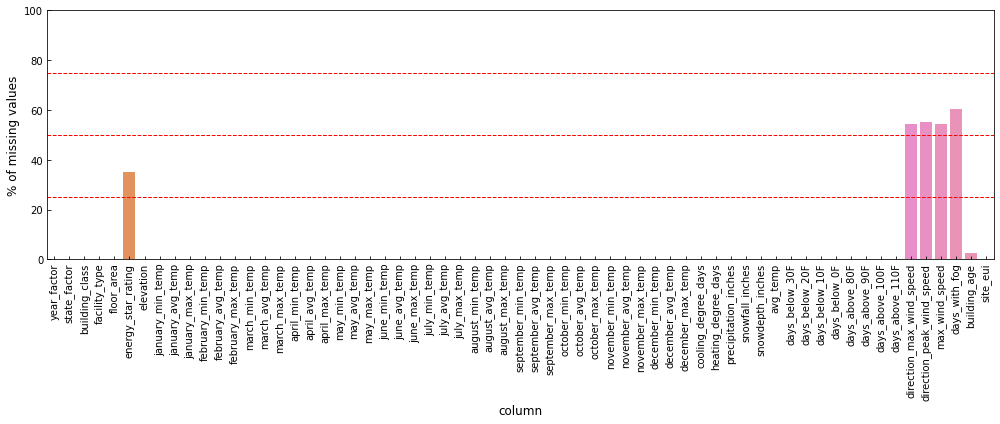

In [8]:
# Missing values in the dataset
plt.figure(figsize = (14, 6))
df_temp = data.isna().sum() * 100 / len(data)
s = sns.barplot(y = df_temp.values, x = df_temp.index)
s.set_ylim(0, 100)
s.set_xlabel("column", fontsize = 12)
s.set_ylabel("% of missing values", fontsize = 12)
s.tick_params(direction="in", left=True, bottom =True)
plt.xticks(rotation='vertical', ha='center')
plt.axhline(y=25, color='red', linestyle='--', linewidth =1)
plt.axhline(y=50, color='red', linestyle='--', linewidth =1)
plt.axhline(y=75, color='red', linestyle='--', linewidth =1)
plt.tight_layout()
plt.show()

### **<span style="color:blue;"> Data Cleaning</span>** 

In [9]:
cleaned_data = data = data.copy(deep=True)

In [10]:
# Drop all the columns which contain more than 50% of missing values  
perc = 50.0
min_count =  int(((100-perc)/100)*cleaned_data.shape[0] + 1)
cleaned_data = cleaned_data.dropna( axis=1, thresh=min_count)
cleaned_data.shape

(75757, 59)

In [11]:
# Drop all the raws which contain missing values for the attribute "building_age"
cleaned_data = cleaned_data.dropna(subset=['building_age'])
cleaned_data.shape

(73920, 59)

In [12]:
# Replace all the missing values in "energy_star_rating" by "0"
cleaned_data['energy_star_rating'] = cleaned_data['energy_star_rating'].fillna(0)
cleaned_data.shape

(73920, 59)

In [13]:
cleaned_data['year_factor'] = cleaned_data['year_factor'].astype(str)         # Transform integer to string

In [14]:
#cleaned_data.head

### **<span style="color:blue;"> Prepare the Data for Machine Learning Algorithms</span>** 

In [15]:
X = cleaned_data.drop("site_eui", axis = 1)
y = cleaned_data['site_eui']

In [16]:
cols = X.columns

In [17]:
num_cols = X._get_numeric_data().columns
num_cols

Index(['floor_area', 'energy_star_rating', 'elevation', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_

In [18]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['state_factor', 'building_class', 'facility_type', 'year_factor']

In [19]:
#get column index for each column in list
[X.columns.get_loc(c) for c in cat_cols if c in X]

[1, 2, 3, 0]

### **Encoding categorical data**

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X[cat_cols] = enc.fit_transform(X[cat_cols] )

In [21]:
X[cat_cols]

,state_factor,building_class,facility_type,year_factor
id,,,,
0,0.0,0.0,13.0,0.0
1,0.0,0.0,55.0,0.0
2,0.0,0.0,48.0,0.0
3,0.0,0.0,6.0,0.0
4,0.0,0.0,56.0,0.0
...,...,...,...,...
75752,2.0,0.0,32.0,5.0
75753,2.0,1.0,1.0,5.0
75754,2.0,0.0,2.0,5.0


### **Scaling Numerica data**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
mmsc = MinMaxScaler()
X[num_cols] = mmsc.fit_transform(X[num_cols] )

In [23]:
X[num_cols]

,floor_area,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,building_age
id,,,,,,,,,,,,,,,,,,,,,
0,0.009359,0.11,0.001281,0.916667,0.896213,0.742857,0.872727,0.854480,0.875,0.875000,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.036228
1,0.042855,0.45,0.000000,0.916667,0.896213,0.742857,0.872727,0.854480,0.875,0.875000,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.029777
2,0.043804,0.97,0.000000,0.916667,0.896213,0.742857,0.872727,0.854480,0.875,0.875000,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.031762
3,0.008427,0.46,0.000000,0.916667,0.896213,0.742857,0.872727,0.854480,0.875,0.875000,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.017370
4,0.010108,1.00,0.001281,0.916667,0.896213,0.742857,0.872727,0.854480,0.875,0.875000,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.014888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,0.002930,0.08,0.074280,0.783333,0.737072,0.400000,0.854545,0.787729,0.650,0.785714,...,0.563118,0.043796,0.000000,0.0,0.0,0.146154,0.057692,0.0,0.0,0.009926
75753,0.006091,0.98,0.074280,0.783333,0.737072,0.400000,0.854545,0.787729,0.650,0.785714,...,0.563118,0.043796,0.000000,0.0,0.0,0.146154,0.057692,0.0,0.0,0.052109
75754,0.004136,0.00,0.074280,0.750000,0.582666,0.171429,0.781818,0.649635,0.500,0.678571,...,0.179965,0.189781,0.021505,0.0,0.0,0.000000,0.000000,0.0,0.0,0.048635


In [24]:
X = pd.concat([X[cat_cols], X[num_cols]], axis = 1)
X

,state_factor,building_class,facility_type,year_factor,floor_area,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,building_age
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,13.0,0.0,0.009359,0.11,0.001281,0.916667,0.896213,0.742857,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.036228
1,0.0,0.0,55.0,0.0,0.042855,0.45,0.000000,0.916667,0.896213,0.742857,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.029777
2,0.0,0.0,48.0,0.0,0.043804,0.97,0.000000,0.916667,0.896213,0.742857,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.031762
3,0.0,0.0,6.0,0.0,0.008427,0.46,0.000000,0.916667,0.896213,0.742857,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.017370
4,0.0,0.0,56.0,0.0,0.010108,1.00,0.001281,0.916667,0.896213,0.742857,...,0.659752,0.000000,0.000000,0.0,0.0,0.061538,0.000000,0.0,0.0,0.014888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,2.0,0.0,32.0,5.0,0.002930,0.08,0.074280,0.783333,0.737072,0.400000,...,0.563118,0.043796,0.000000,0.0,0.0,0.146154,0.057692,0.0,0.0,0.009926
75753,2.0,1.0,1.0,5.0,0.006091,0.98,0.074280,0.783333,0.737072,0.400000,...,0.563118,0.043796,0.000000,0.0,0.0,0.146154,0.057692,0.0,0.0,0.052109
75754,2.0,0.0,2.0,5.0,0.004136,0.00,0.074280,0.750000,0.582666,0.171429,...,0.179965,0.189781,0.021505,0.0,0.0,0.000000,0.000000,0.0,0.0,0.048635


### **Test set split**

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)

### **Random Forest Regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
forest_reg = RandomForestRegressor()

In [39]:
forest_reg.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [40]:
RandomForest_predictions=forest_reg.predict(X=X_train)

In [42]:
#Measure the performance of the model using the RMSE metric
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_true=y_train, y_pred=RandomForest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

15.339107640186496

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, RandomForest_predictions)
print('r2 score for lin_reg model is', r2)

r2 score for lin_reg model is 0.9312425245561424


In [53]:
import sklearn
# predict prices of X_test
y_pred = forest_reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5199008950959959


In [54]:
# Mean Squared Error
RMSE= np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
RMSE

38.180419728489426

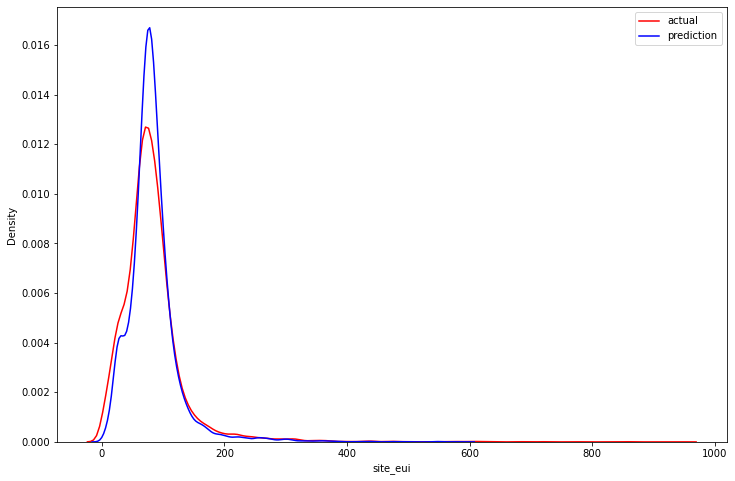

In [55]:
plt.figure(figsize=(12,8))
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)
plt.legend()
plt.show()

### Hyperparameter Tuning with Grid Search

In [26]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

# Creating Parameter grid for GridSearch CV
params_rf = {
    'n_estimators': [500,1000], # No of trees
    'max_depth': [10,15], # maximum depth to explore
    'min_samples_split':[5], # minimum samples required for split
    'min_samples_leaf':[5], # minimum samples required at leaf
    'max_features': [ 'auto'] # number of features for the best split
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator = rf, # regressor we want to use
                       param_grid = params_rf, # Hyperparameter space
                       scoring ='neg_mean_squared_error', # MSE will be performance metric
                       cv = 3, # #of folds
                       verbose = 1,
                       n_jobs = -1) # use all cores

# fit the model
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'max_features': ['auto'],
                         'min_samples_leaf': [5], 'min_samples_split': [5],
                         'n_estimators': [500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
print(grid_rf.best_estimator_)
best = grid_rf.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=500, random_state=42)


In [51]:
best = grid_rf.best_estimator_
import sklearn
# predict prices of X_test
y_pred = best.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print(r2)

0.6152720717016429


In [52]:
# Mean Squared Error
RMSE= np.sqrt(np.square(np.subtract(y_train, y_pred)).mean())
RMSE

36.28415310388721

In [28]:
best = grid_rf.best_estimator_
import sklearn
# predict prices of X_test
y_pred = best.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.47693473136090103


In [29]:
# Mean Squared Error
RMSE= np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
RMSE

39.85228176869261

### **Recursive Feature Elimination**

### **Train and Test the model with different number of features**

Optimal number of features : 7


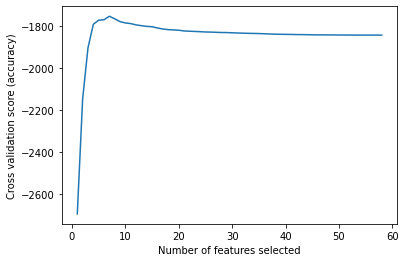

In [30]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=best,
    step=1,
    cv=5,
    scoring ='neg_mean_squared_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

Optimal number of features : 7


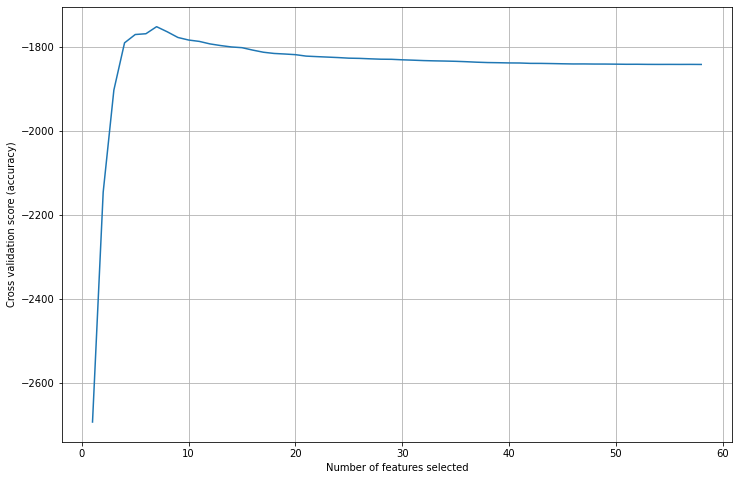

In [31]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
import seaborn as sns
plt.figure(figsize=(12,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.grid()
plt.show()

In [49]:
# predict prices of X_test
y_pred = rfecv.predict(X_train)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print(r2)

0.6266984886704307


In [50]:
# can tune other metrics, such as MSE
# Root Mean Squared Error
RMSE= np.sqrt(np.square(np.subtract(y_train, y_pred)).mean())
RMSE

35.74127227678133

In [32]:
# predict prices of X_test
y_pred = rfecv.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5095784441427404


In [33]:
# can tune other metrics, such as MSE
# Root Mean Squared Error
RMSE= np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
RMSE

38.588689127283565

In [34]:
columns = X.columns
rfecv_features = []

for col, selected in zip(columns, rfecv.get_support()):
    if selected:
        rfecv_features.append(col)
print(rfecv_features)

['state_factor', 'building_class', 'facility_type', 'floor_area', 'energy_star_rating', 'snowdepth_inches', 'building_age']


In [57]:
features_kept = pd.DataFrame({'columns': X.columns,
                             'Kept': rfecv.support_})
features_kept

,columns,Kept
0,state_factor,True
1,building_class,True
2,facility_type,True
3,year_factor,False
4,floor_area,True
5,energy_star_rating,True
6,elevation,False
7,january_min_temp,False
8,january_avg_temp,False
9,january_max_temp,False


In [58]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.head()

,state_factor,building_class,facility_type,floor_area,energy_star_rating,snowdepth_inches,building_age
id,,,,,,,
0,0.0,0.0,13.0,0.009359,0.11,0.0,0.036228
1,0.0,0.0,55.0,0.042855,0.45,0.0,0.029777
2,0.0,0.0,48.0,0.043804,0.97,0.0,0.031762
3,0.0,0.0,6.0,0.008427,0.46,0.0,0.017370
4,0.0,0.0,56.0,0.010108,1.00,0.0,0.014888


In [59]:
rfecv.ranking_

array([ 1,  1,  1, 39,  1,  1,  3,  8, 21, 28,  2,  7, 14, 12, 36, 29, 20,
        4, 32, 18, 27, 46, 22, 19, 42, 15,  5, 44, 31, 17, 47, 38, 11, 30,
       33,  9, 40, 34, 23, 16, 37, 43, 24, 45, 13,  6, 10,  1, 26, 25, 48,
       49, 50, 35, 41, 51, 52,  1])

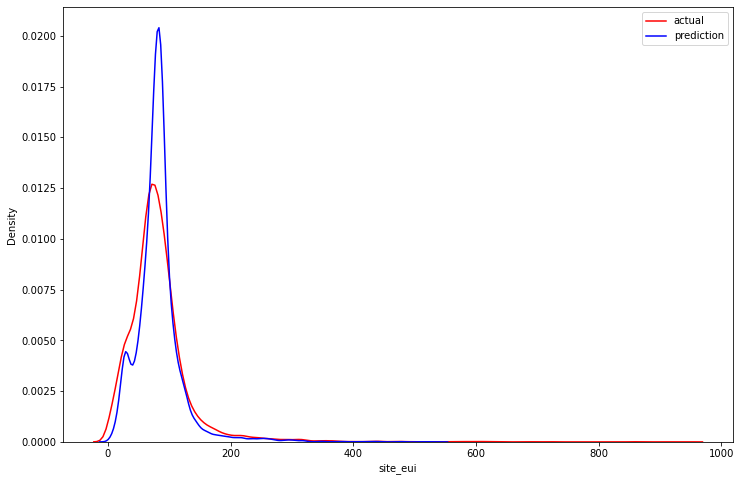

In [35]:
plt.figure(figsize=(12,8))
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)
plt.legend()
plt.show()